In [1]:
import os
import csv
from PIL import Image
from PIL import ImageFilter
import pandas as pd
import numpy as np
import random
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
from matplotlib import pyplot as plt
import scipy.io
from scipy.misc import toimage
from sklearn.metrics import confusion_matrix
import glob
import time

#import pytorch_ssim

In [2]:
rootdir_v = './data_v_15/'
dir_name_shallow = "PAPER_SRCNN_4ch_l1_20s_d_1"
dir_name_deep = "PAPER_VDSR_4ch_l1_20s_d_1"
path = "./params_adni/" + dir_name_shallow
path_deep = "./params_adni/" + dir_name_deep
in_ch = 4
ep1 = 150
ch = 64
ksize = 3
pad = 1


In [3]:
class Shallow(nn.Module):
    def __init__(self):
        super(Shallow, self).__init__()
        self.input = nn.Sequential(         
            nn.Conv2d(
                in_channels=in_ch,              # input height
                out_channels=ch,            # n_filters
                kernel_size=ksize,              # filter size
                stride=1,                   # filter movement/step
                padding=pad,                  
                ),
            nn.LeakyReLU(inplace=False),

        )
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=ch, out_channels=int(ch/2), kernel_size=ksize, stride=1, padding=pad),
            nn.LeakyReLU(inplace=False),
        )

        self.output = nn.Sequential(
                    nn.Conv2d(
                        in_channels=int(ch/2),              # input height
                        out_channels=1,            # n_filters
                        kernel_size=ksize,              # filter size
                        stride=1,                   # filter movement/step
                        padding=pad,
                    ),


        )



            

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))

    def forward(self, x):
        LR = x[:,:1,:,:]
        x1 = self.input(x)
        x2 = self.layers(x1)
        x3 = self.output(x2)

        out = torch.add(x3, LR)

        return out

    def save_p(self, epoch):
        modelparam = path + "/inputEpoch" + str(epoch) +".pkl"
        torch.save(self.input.state_dict(), modelparam)    
        modelparam = path + "/layersEpoch" + str(epoch) +".pkl"
        torch.save(self.layers.state_dict(), modelparam)
        modelparam = path + "/outputEpoch" + str(epoch) +".pkl"
        torch.save(self.output.state_dict(), modelparam)
        print("Epoch ", epoch, ":  Model saved!!")

    def restore_netparam(self, epoch):
        modelparam = path + "/inputEpoch" + str(epoch) +".pkl"
        self.input.load_state_dict(torch.load(modelparam))
        modelparam = path + "/layersEpoch" + str(epoch) +".pkl"
        self.layers.load_state_dict(torch.load(modelparam))
        modelparam = path + "/outputEpoch" + str(epoch) +".pkl"
        self.output.load_state_dict(torch.load(modelparam))
        print("Shallow network model is restored!!")

        
class Deep(nn.Module):
    def __init__(self):
        super(Deep, self).__init__()
        self.input = nn.Sequential(         
                    nn.Conv2d(
                        in_channels=in_ch,              # input height
                        out_channels=ch,            # n_filters
                        kernel_size=ksize,              # filter size
                        stride=1,                   # filter movement/step
                        padding=pad,                  
                        ),

                nn.LeakyReLU(inplace=False),

            )
        self.layers = nn.Sequential(

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),

                    nn.Conv2d(in_channels=ch, out_channels=ch, kernel_size=ksize, stride=1, padding=pad),

                    nn.LeakyReLU(inplace=False),


        )

        self.output = nn.Sequential(
                    nn.Conv2d(
                        in_channels=ch,              # input height
                        out_channels=1,            # n_filters
                        kernel_size=ksize,              # filter size
                        stride=1,                   # filter movement/step
                        padding=pad,
                    ),


            )



            

        for m in self.modules():
                    if isinstance(m, nn.Conv2d):
                        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                        m.weight.data.normal_(0, math.sqrt(2. / n))


    def forward(self, x):
        LR = x[:,:1,:,:]
        x1 = self.input(x)
        x2 = self.layers(x1)
        x3 = self.output(x2)

        out = torch.add(x3, LR)

        return out

    def save_p(self, epoch):
        modelparam = path + "/inputEpoch" + str(epoch) +".pkl"
        torch.save(self.input.state_dict(), modelparam)    
        modelparam = path + "/layersEpoch" + str(epoch) +".pkl"
        torch.save(self.layers.state_dict(), modelparam)
        modelparam = path + "/outputEpoch" + str(epoch) +".pkl"
        torch.save(self.output.state_dict(), modelparam)
        print("Epoch ", epoch, ":  Model saved!!")

    def restore_netparam(self, epoch):	
        modelparam = path_deep + "/inputEpoch" + str(epoch) +".pkl"
        self.input.load_state_dict(torch.load(modelparam))
        modelparam = path_deep + "/layersEpoch" + str(epoch) +".pkl"
        self.layers.load_state_dict(torch.load(modelparam))
        modelparam = path_deep + "/outputEpoch" + str(epoch) +".pkl"
        self.output.load_state_dict(torch.load(modelparam))
        print("Deep netwoek model is restored!!")



def default_loader(path):


    #print path
    data = scipy.io.loadmat(path)
    #print(path)
    imgs = np.squeeze(data['mat'])
    p_max = data['pmax']
    m_max = data['mmax']
    Rrange = 179.6051
    Rmin = 0.7071
    #print im.size
        #new_imgs = np.zeros((256,256,3))
    in_ch = 4
    if in_ch != 3:
        temp = imgs[:,:,2] / p_max[0]
        imgs[:,:,0] = imgs[:,:,0] / p_max[0]
        imgs[:,:,1] = imgs[:,:,1] / m_max[0]
        imgs[:,:,2] = (imgs[:,:,3] - Rmin) / Rrange 
        imgs[:,:,3] = (imgs[:,:,4] + 127.5) / 255.0
        imgs[:,:,4] = temp

    else:
        temp = imgs[:,:,2] / p_max[0]
        imgs[:,:,0] = imgs[:,:,0] / p_max[0]
        #imgs[:,:,1] = imgs[:,:,1] / m_max[0]
        imgs[:,:,1] = (imgs[:,:,3] - Rmin) / Rrange 
        imgs[:,:,2] = (imgs[:,:,4] + 127.5) / 255.0
        imgs[:,:,4] = temp



    name = os.path.basename(path)

    return imgs, p_max[0], m_max[0], name




class myImageFloder(Data.Dataset):
    def __init__(self, root, label, transform = None, target_transform=None, loader=default_loader, mode = 0):

        self.root = root
        self.imgs = glob.glob(root + "p8_z70*.mat")
        self.transform = transform
        self.target_transform = target_transform
        self.loader = loader

    def __getitem__(self, index):
        img_path = self.imgs[index]
        img1, pmax, mmax, name = self.loader(img_path)

        img1 = torch.FloatTensor(torch.from_numpy(img1.transpose((2, 0, 1))).float())

        if self.transform is not None:

            img1[:4,:,:]= self.transform(img1[:4,:,:])

        return img1, pmax, mmax, name

    def __len__(self):
        return len(self.imgs)

    def getName(self):
        return self.classes
    
    
    

In [4]:
shallow_cnn = Shallow()
print(shallow_cnn)  # net architecture
shallow_cnn.restore_netparam(150)
shallow_cnn.cuda()

deep_cnn = Deep()
print(deep_cnn)  # net architecture
deep_cnn.restore_netparam(135)
deep_cnn.cuda()

val = torch.utils.data.DataLoader(
        myImageFloder(root = rootdir_v, label = None, transform = None, mode = 1),
            batch_size= 1, 
            shuffle= False, 
            num_workers=1, 
            drop_last = False)



Shallow(
  (input): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (layers): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (output): Sequential(
    (0): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)
Shallow network model is restored!!
Deep(
  (input): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (layers): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=

torch.Size([5, 192, 192])


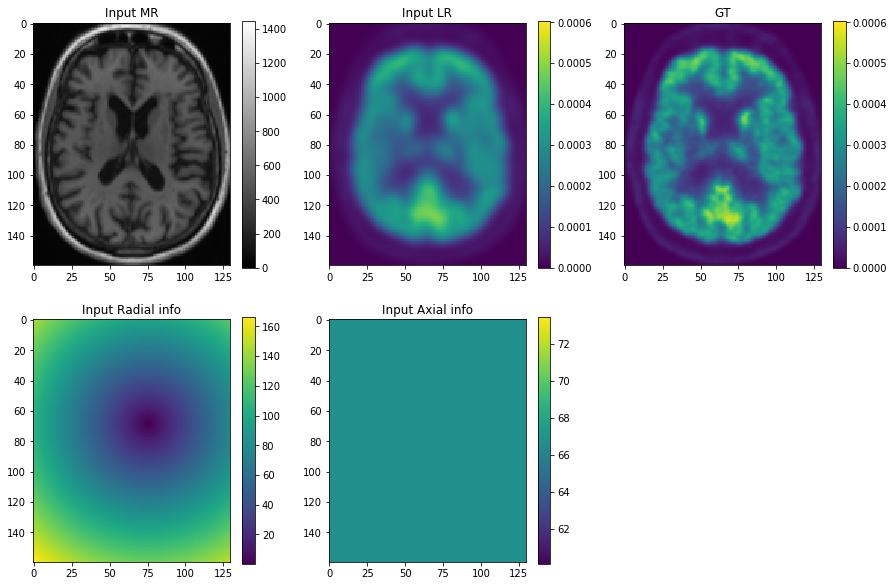

In [5]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)
print(X.size())

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(np.rot90(np.squeeze(X[1,20:150,5:165].numpy())* mmax,1), cmap='gray', vmin=0, vmax=mmax)
plt.title('Input MR')
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(np.rot90(np.squeeze(X[0,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Input LR')
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(np.rot90(np.squeeze(X[4,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,3,4)
plt.imshow(np.rot90(np.squeeze(X[2,20:150,5:165].numpy())*255,1), cmap='viridis')
plt.title('Input Radial info')
plt.colorbar()
plt.subplot(2,3,5)
plt.title('Input Axial info')
plt.imshow(np.rot90(np.squeeze(X[3,20:150,5:165].numpy())*128,1), cmap='viridis')
plt.colorbar()


In [6]:
# Salloe SR 
for step, (x, pmax, mmax, name) in enumerate(val):

    with torch.no_grad():
        #print x.size()
        temp_x = x.size()[2]
        temp_y = x.size()[3]


        out = torch.FloatTensor(1, in_ch, temp_x, temp_y)
        out1 = torch.FloatTensor(1, 1, temp_x, temp_y)
        out[:,:,:,:] =  x[:,:in_ch,:,:]

        v_input = Variable(out.cuda())
        shallow_SR = shallow_cnn(v_input)
        deep_SR = deep_cnn(v_input)
        #print(s_output.size())

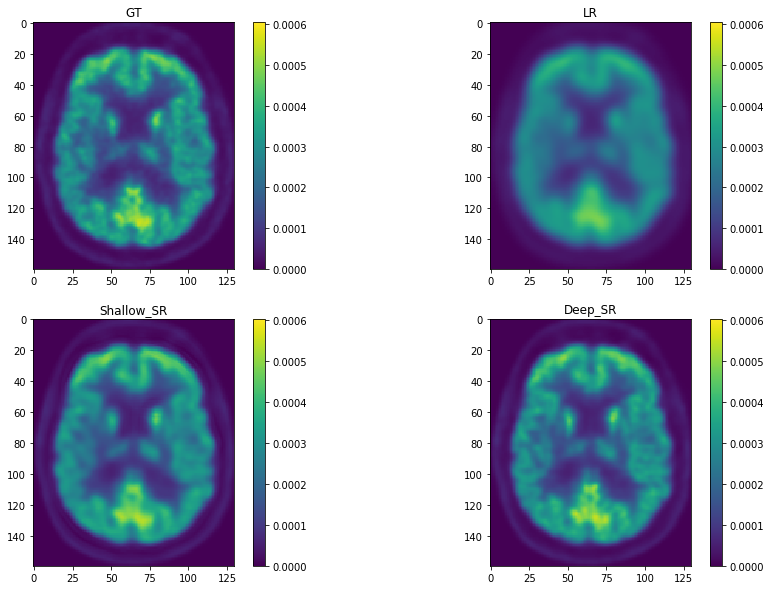

In [14]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(np.rot90(np.squeeze(X[4,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.rot90(np.squeeze(X[0,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('LR')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(np.rot90(np.squeeze(shallow_SR[0,0,20:150,5:165].cpu().numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Shallow_SR')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(np.rot90(np.squeeze(deep_SR[0,0,20:150,5:165].cpu().numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Deep_SR')
plt.colorbar()